In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os ## We can access our OS using this library
import seaborn as sns

In [2]:
files = [file for file in os.listdir('C:/Users/Devanshu Agarwal/Documents/Python/Sales Data Analysis/Sales_Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = "C:/Users/Devanshu Agarwal/Documents/Python/Sales Data Analysis/Sales_Data"
all_data = pd.DataFrame()
for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])

all_data.shape

(560550, 6)

In [21]:
all_data.to_csv("C:/Users/Devanshu Agarwal/Documents/Python/Sales Data Analysis/Sales_Data/all_data.csv", index = False)

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [6]:
all_data.dropna(axis = 0, inplace = True)

In [7]:
all_data.shape

(558915, 6)

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [38]:
"04/19/19 08:46".split("/")[0]

'04'

In [9]:
def month(x):
    return x.split("/")[0]

all_data["Month"] = all_data["Order Date"].apply(month)

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [12]:
all_data["Month"] = all_data["Month"].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [13]:
all_data["Month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [14]:
(all_data["Month"] == "Order Date").sum()

1065

In [15]:
all_data = all_data[all_data["Month"] != "Order Date"]

In [16]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [17]:
all_data["Month"] = all_data["Month"].astype(int)

In [18]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [19]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)

In [20]:
all_data["Price Each"] = all_data["Price Each"].astype(float)

In [21]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [22]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [23]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
total_sales_by_month = all_data.groupby("Month")["Sales"].sum()

In [26]:
total_sales_by_month

Month
1     5.466770e+06
2     6.606067e+06
3     8.421301e+06
4     1.017201e+07
5     9.457820e+06
6     7.733407e+06
7     7.943327e+06
8     6.733404e+06
9     6.292680e+06
10    1.121018e+07
11    9.598810e+06
12    1.384033e+07
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in USD')

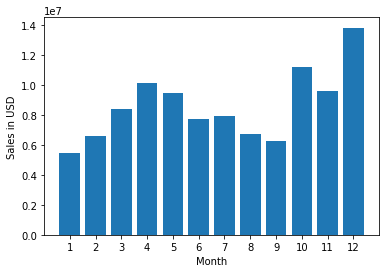

In [27]:
months = range(1, 13)
plt.bar(months, total_sales_by_month)
plt.xticks(months)

plt.xlabel("Month")
plt.ylabel("Sales in USD")


In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
"682 Chestnut St, Boston, MA 02215".split(",")[1]

' Boston'

In [30]:
def city_name(x):
    return x.split(",")[1]

all_data["City"] = all_data["Purchase Address"].apply(city_name)

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [32]:
all_data["City"].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [33]:
total_orders_by_city = all_data.groupby("City")["City"].count()

In [34]:
total_orders_by_city

City
 Atlanta           44643
 Austin            29715
 Boston            59802
 Dallas            44460
 Los Angeles       88815
 New York City     74628
 Portland          37395
 San Francisco    134196
 Seattle           44196
Name: City, dtype: int64

Text(0.5, 1.0, 'Total orders by city')

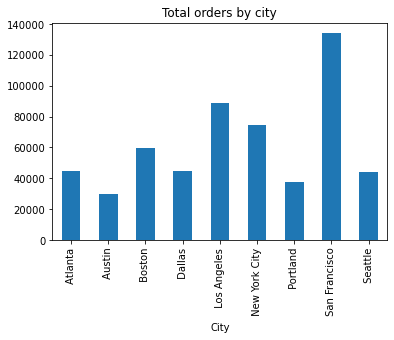

In [35]:
total_orders_by_city.plot.bar()
plt.title("Total orders by city")

In [36]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
dtype: object

In [37]:
# Convert the column to datetime
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [39]:
all_data["Hour"] = all_data["Order Date"].dt.hour

In [40]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [41]:
keys = []
hour = []
for key, hour_df in all_data.groupby("Hour"):
    keys.append(key)
    hour.append(len(hour_df))

In [42]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [43]:
hour

[11730,
 7050,
 3729,
 2493,
 2562,
 3963,
 7446,
 12033,
 18768,
 26244,
 32832,
 37233,
 37761,
 36387,
 32952,
 30525,
 31152,
 32697,
 36840,
 38715,
 36684,
 32763,
 26466,
 18825]

In [44]:
all_data.groupby("Hour")["Hour"].count()

Hour
0     11730
1      7050
2      3729
3      2493
4      2562
5      3963
6      7446
7     12033
8     18768
9     26244
10    32832
11    37233
12    37761
13    36387
14    32952
15    30525
16    31152
17    32697
18    36840
19    38715
20    36684
21    32763
22    26466
23    18825
Name: Hour, dtype: int64

<AxesSubplot:xlabel='Hour'>

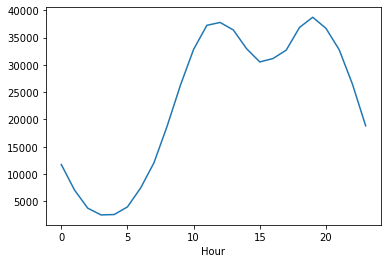

In [45]:
all_data.groupby("Hour")["Hour"].count().plot()

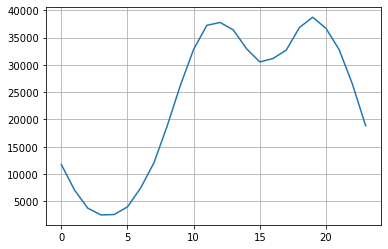

In [46]:
plt.plot(keys, hour)
plt.grid()

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [48]:
all_data.groupby("Product")["Quantity Ordered"].sum()

Product
20in Monitor                  12387
27in 4K Gaming Monitor        18732
27in FHD Monitor              22650
34in Ultrawide Monitor        18597
AA Batteries (4-pack)         82905
AAA Batteries (4-pack)        93051
Apple Airpods Headphones      46983
Bose SoundSport Headphones    40371
Flatscreen TV                 14457
Google Phone                  16596
LG Dryer                       1938
LG Washing Machine             1998
Lightning Charging Cable      69651
Macbook Pro Laptop            14184
ThinkPad Laptop               12390
USB-C Charging Cable          71925
Vareebadd Phone                6204
Wired Headphones              61671
iPhone                        20547
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

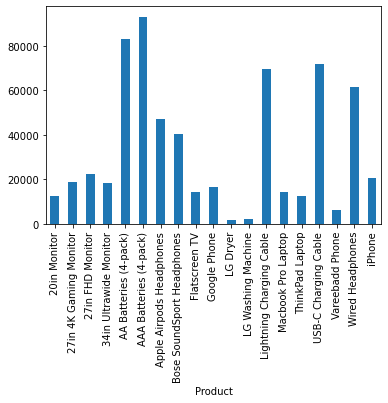

In [49]:
all_data.groupby("Product")["Quantity Ordered"].sum().plot.bar()

In [50]:
products = []
qty = []
for product, product_df in all_data.groupby("Product"):
    products.append(product)
    qty.append(product_df["Quantity Ordered"].sum())

In [51]:
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [52]:
qty

[12387,
 18732,
 22650,
 18597,
 82905,
 93051,
 46983,
 40371,
 14457,
 16596,
 1938,
 1998,
 69651,
 14184,
 12390,
 71925,
 6204,
 61671,
 20547]

In [53]:
all_data.groupby("Product")["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<AxesSubplot:xlabel='Product'>

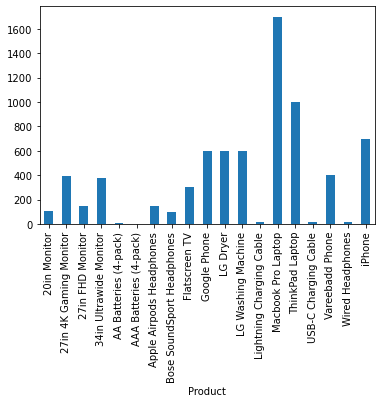

In [54]:
all_data.groupby("Product")["Price Each"].mean().plot.bar()

In [55]:
tot_qty = all_data.groupby("Product")["Quantity Ordered"].sum()
all_pdts = all_data.groupby("Product")["Quantity Ordered"].sum().index
price_per_pdt = all_data.groupby("Product")["Price Each"].mean()

<ipython-input-56-86ea78ede906>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(all_pdts, rotation = "vertical", size = 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

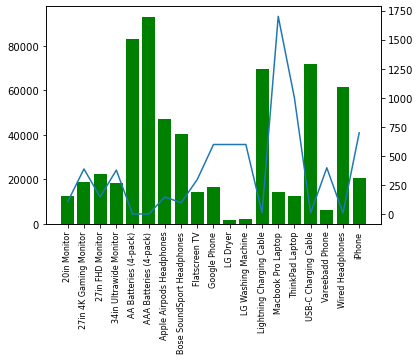

In [56]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(all_pdts, tot_qty, color = 'g')
ax2.plot(all_pdts, price_per_pdt)
ax1.set_xticklabels(all_pdts, rotation = "vertical", size = 8)

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [58]:
all_data.reset_index(drop = True, inplace = True)

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [72]:
all_data.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int64
Grouped                    float64
dtype: object

In [62]:
all_data["Order ID"] = all_data["Order ID"].astype(int)

In [63]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [89]:
len(all_data)

557850

In [90]:
order_group = []
order_count = []
for key, order_df in all_data.groupby("Order ID"):
    count = 0
    orders = ""
    if len(order_df) != 1:
        order_group.append(",".join(order_df["Product"]))

In [91]:
order_group

['iPhone,iPhone,iPhone',
 'Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable',
 'Wired Headphones,Wired Headphones,Wired Headphones',
 '27in FHD Monitor,27in FHD Monitor,27in FHD Monitor',
 'Wired Headphones,Wired Headphones,Wired Headphones',
 'AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)',
 '27in 4K Gaming Monitor,27in 4K Gaming Monitor,27in 4K Gaming Monitor',
 'USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable',
 'Bose SoundSport Headphones,Bose SoundSport Headphones,Bose SoundSport Headphones',
 'Apple Airpods Headphones,Apple Airpods Headphones,Apple Airpods Headphones',
 'Apple Airpods Headphones,Apple Airpods Headphones,Apple Airpods Headphones',
 'Macbook Pro Laptop,Macbook Pro Laptop,Macbook Pro Laptop',
 'AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)',
 '27in FHD Monitor,27in FHD Monitor,27in FHD Monitor',
 'Flatscreen TV,Flatscreen TV,Flatscreen TV',
 '27in FHD Monitor,27in FHD Monitor,27in

In [87]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,NaN
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,NaN
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,NaN
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,NaN
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,NaN
